In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os,fnmatch

In [2]:
music="dataset/input/heartbeat-sounds/set_a/"
import librosa
import IPython.display as ipd
x,sr=librosa.load(music+"Aunlabelledtest__201106171155.wav",duration=5)
ipd.Audio(x,rate=sr)

In [3]:
def ses_df(music_folders,columnas,tipe_liste):
    liste=[]
    adim=0
    for folder in music_folders:
        for tipe in tipe_liste:
            carpetas=fnmatch.filter(os.listdir(folder),tipe)
            label=tipe.split("*")[0]
            for archivo in carpetas:
                x,sr=librosa.load(folder+archivo,duration=5,res_type='kaiser_fast')
                liste.append([np.mean(x) for x in librosa.feature.mfcc(x,sr=sr)])
                liste[adim].append(sum(librosa.zero_crossings(x)))
                liste[adim].append(np.mean(librosa.feature.spectral_centroid(x)))
                liste[adim].append(np.mean(librosa.feature.spectral_rolloff(x,sr=sr)))
                liste[adim].append(np.mean(librosa.feature.chroma_stft(x,sr=sr)))
                liste[adim].append(label)
                liste[adim].append(archivo)
                adim+=1
    return pd.DataFrame(liste,columns=columnas)

In [4]:
music_folders=["dataset/input/heartbeat-sounds/set_a/","dataset/input/heartbeat-sounds/set_b/"]
columnas=["mfkk"+str(i) for i in range(20)]
for name in ["zero","centroid","roll-off","chroma","tipe","archivo"]:
    columnas.append(name)
tipe_liste=["normal*.wav","artifact*.wav","murmur*.wav"]
music_df=ses_df(music_folders,columnas,tipe_liste)

C:\Users\Renzi\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [ ]:
print(music_df.shape)
music_df.head()

(525, 26)


,mfkk0,mfkk1,mfkk2,mfkk3,mfkk4,mfkk5,mfkk6,mfkk7,mfkk8,mfkk9,...,mfkk16,mfkk17,mfkk18,mfkk19,zero,centroid,roll-off,chroma,tipe,archivo
0,-504.037964,76.997124,-1.585262,34.563679,0.663375,23.808498,-3.102399,16.335907,-6.465252,11.320951,...,-9.759558,-1.204180,-8.794813,-2.499642,22856,2543.690892,5384.696452,0.671670,normal,normal__201101070538.wav
1,-369.186737,91.602287,8.740098,45.028103,21.458738,27.615288,17.346260,19.143579,14.277477,20.668922,...,6.130361,5.795323,4.890225,3.060663,1486,900.728824,2140.559896,0.750158,normal,normal__201101151127.wav
2,-379.535004,118.246223,8.529406,19.718822,-3.027936,20.717892,0.050543,13.745317,-3.446706,18.079884,...,-11.210547,5.854636,-9.596210,7.771472,10657,1927.470131,4725.541178,0.635878,normal,normal__201102081152.wav
3,-342.682220,133.837189,-11.243758,21.353346,-0.145609,29.179508,-5.019008,13.736671,-3.991349,15.423250,...,-1.418861,6.903130,-1.007653,1.195708,7681,1503.253101,3166.028849,0.637516,normal,normal__201102081321.wav
4,-549.604980,73.100746,-1.697143,28.962118,-0.544705,18.543926,-1.803224,15.123065,-6.083783,9.622066,...,-8.850921,-0.998493,-7.304602,-1.575300,25069,2680.044197,5603.118896,0.677684,normal,normal__201102201230.wav


In [ ]:
music_df["tipe"].value_counts()

normal      351
murmur      134
artifact     40
Name: tipe, dtype: int64

In [ ]:
X=music_df.iloc[:,0:24]
X.head()

,mfkk0,mfkk1,mfkk2,mfkk3,mfkk4,mfkk5,mfkk6,mfkk7,mfkk8,mfkk9,...,mfkk14,mfkk15,mfkk16,mfkk17,mfkk18,mfkk19,zero,centroid,roll-off,chroma
0,-504.037964,76.997124,-1.585262,34.563679,0.663375,23.808498,-3.102399,16.335907,-6.465252,11.320951,...,-9.941511,0.288859,-9.759558,-1.204180,-8.794813,-2.499642,22856,2543.690892,5384.696452,0.671670
1,-369.186737,91.602287,8.740098,45.028103,21.458738,27.615288,17.346260,19.143579,14.277477,20.668922,...,10.951164,7.448577,6.130361,5.795323,4.890225,3.060663,1486,900.728824,2140.559896,0.750158
2,-379.535004,118.246223,8.529406,19.718822,-3.027936,20.717892,0.050543,13.745317,-3.446706,18.079884,...,-7.436246,7.344613,-11.210547,5.854636,-9.596210,7.771472,10657,1927.470131,4725.541178,0.635878
3,-342.682220,133.837189,-11.243758,21.353346,-0.145609,29.179508,-5.019008,13.736671,-3.991349,15.423250,...,0.412823,5.838561,-1.418861,6.903130,-1.007653,1.195708,7681,1503.253101,3166.028849,0.637516
4,-549.604980,73.100746,-1.697143,28.962118,-0.544705,18.543926,-1.803224,15.123065,-6.083783,9.622066,...,-10.037402,-0.315625,-8.850921,-0.998493,-7.304602,-1.575300,25069,2680.044197,5603.118896,0.677684


In [ ]:
y=music_df["tipe"]
y.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: tipe, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder().fit(y)
y=le.transform(y)
y[1:50]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=31)
print("X Train: ",len(X_train),"\n","X Test: ",len(X_test),sep="")

X Train: 393
X Test: 132


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth= 8,
 max_features= 5,
 min_samples_split=5,
 n_estimators=500).fit(X_train,y_train)
forest

RandomForestClassifier(max_depth=8, max_features=5, min_samples_split=5,
                       n_estimators=500)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=forest.predict(X_test)
accuracy_score(y_test,y_pred)

0.8409090909090909

<AxesSubplot:>

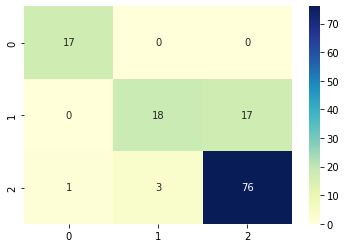

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
mlp=MLPClassifier().fit(X_train_scaled,y_train)
mlp

C:\Users\Renzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
y_pred=mlp.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.8181818181818182

<AxesSubplot:>

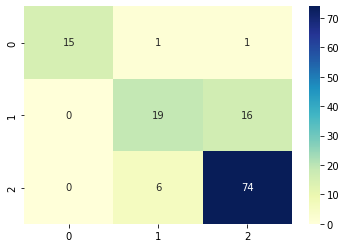

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")